#### This dataset contains information about loan applications,including various attributes related to applicants and whether their loan applications were approved or denied.
#### The dataset is designed to predictive modeling tasks,specifically for predicting whether a loan application will be approved or not based on the provided features
#### So it is classification problem

# Loan_Approval_Prediction

In [1]:
# Importing Main Libiraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline


In [2]:
## Loading the dataset

df =pd.read_csv("Dataset.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# showing first five rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# showing last five rows
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
# Showing total no of rows in dataset
len(df)

614

## Exploratory data analysis

In [7]:
# Showing no of rows and columns
df.shape

(614, 13)

In [8]:
# Numbers of rows
df.shape[0]

614

In [9]:
# Numbers of columns
df.shape[1]

13

In [10]:
# number of elements in df
df.size

7982

In [11]:
# Name of columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Clean data - Feature Engineering

In [12]:
# First we check deta information by using info()method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
# Showing missing values in df
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
# apply sorting
df.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

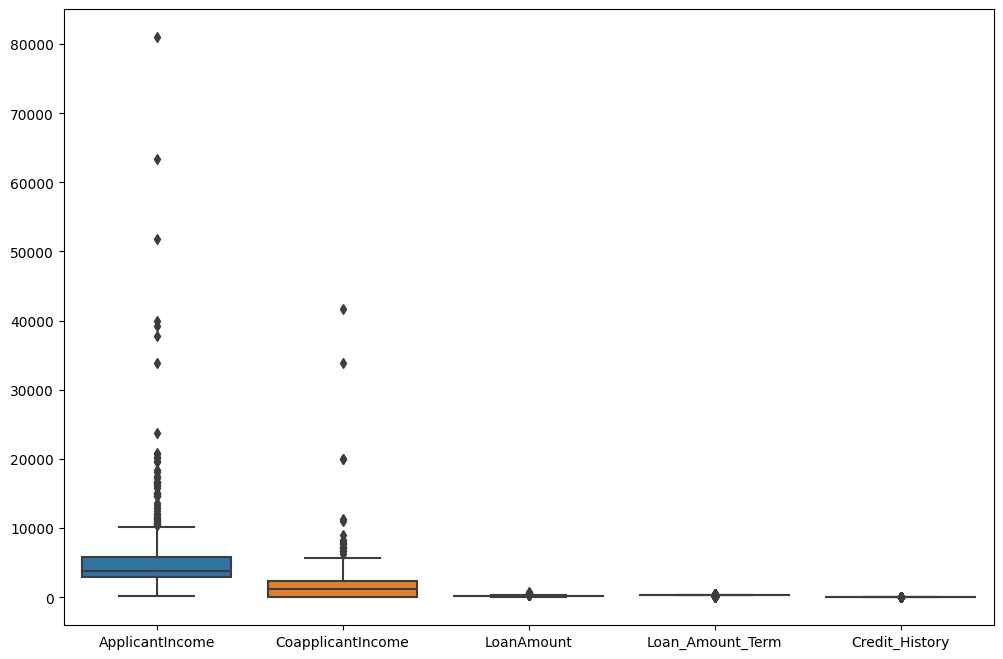

In [15]:
# Checking outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=df)

In [16]:
# fill the missing values of numirical datatypes

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [17]:
# fill the missing values of object datatypes
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [18]:
# Showing missing values in df
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

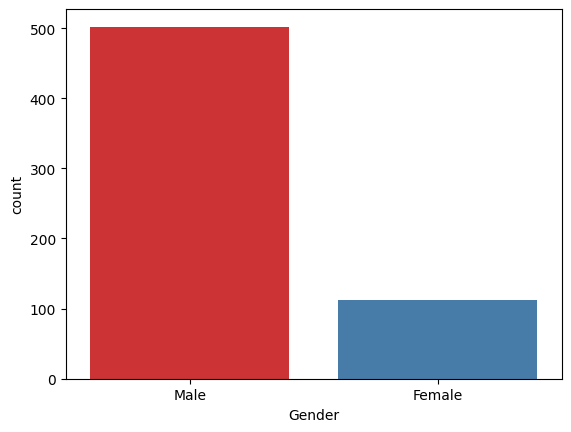

In [19]:
# Number of pepple who took loan by gender
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette='Set1')

Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

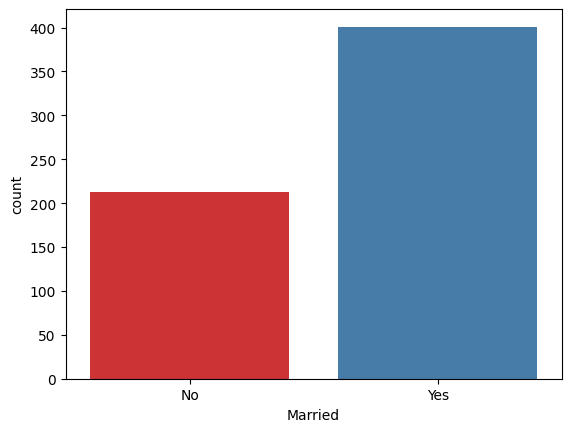

In [20]:
# Number of pepple who took loan by Married
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set1')

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

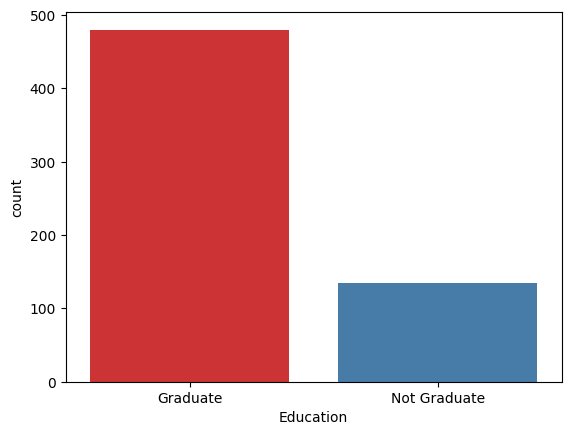

In [21]:
# Number of pepple who took loan by Education
print(df['Education'].value_counts())
sns.countplot(x='Education',data=df,palette='Set1')

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
# creating Total applicant income columns
df["Total_Applicant"]= df["ApplicantIncome"]+ df["CoapplicantIncome"]

In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [25]:
# features scaling
scaler = MinMaxScaler()

In [26]:
df['LoanAmount']=scaler.fit_transform(df[['LoanAmount']])
df['Loan_Amount_Term']=scaler.fit_transform(df[['Loan_Amount_Term']])
df['Total_Applicant']=scaler.fit_transform(df[['Total_Applicant']])

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.172214,0.74359,1.0,Urban,Y,0.055394
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,0.172214,0.74359,1.0,Rural,N,0.058435
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,0.082489,0.74359,1.0,Urban,Y,0.019583
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,0.160637,0.74359,1.0,Urban,Y,0.043980
4,LP001008,Male,No,0,Graduate,No,6000,0.0,0.191027,0.74359,1.0,Urban,Y,0.057292


In [28]:
# Droping the columns
cols=["Loan_ID","ApplicantIncome","CoapplicantIncome",]
df.drop(columns=cols,axis=1,inplace = True)

In [29]:
# Encodaing Technique : Label Encoding , One Hot Encoading

col=["Gender","Married","Education","Dependents","Self_Employed","Property_Area","Loan_Status"]
     
leb=LabelEncoder()
for cols in col:
    df[cols]=leb.fit_transform(df[cols])


In [30]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant
0,1,0,0,0,0,0.172214,0.74359,1.0,2,1,0.055394
1,1,1,1,0,0,0.172214,0.74359,1.0,0,0,0.058435
2,1,1,0,0,1,0.082489,0.74359,1.0,2,1,0.019583
3,1,1,0,1,0,0.160637,0.74359,1.0,2,1,0.043980
4,1,0,0,0,0,0.191027,0.74359,1.0,2,1,0.057292


In [31]:
df.shape

(614, 11)

In [32]:
df.dtypes

Gender                int32
Married               int32
Dependents            int32
Education             int32
Self_Employed         int32
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int32
Loan_Status           int32
Total_Applicant     float64
dtype: object

## Data Prepration

In [33]:
X=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [34]:
X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Applicant
0,1,0,0,0,0,0.172214,0.743590,1.0,2,0.055394
1,1,1,1,0,0,0.172214,0.743590,1.0,0,0.058435
2,1,1,0,0,1,0.082489,0.743590,1.0,2,0.019583
3,1,1,0,1,0,0.160637,0.743590,1.0,2,0.043980
4,1,0,0,0,0,0.191027,0.743590,1.0,2,0.057292
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0.089725,0.743590,1.0,0,0.018326
610,1,1,3,0,0,0.044863,0.358974,1.0,0,0.033485
611,1,1,1,0,0,0.353111,0.743590,1.0,2,0.086352
612,1,1,2,0,0,0.257598,0.743590,1.0,2,0.077189


In [35]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

## Spliting the Data

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Model Creation [Logistic Regression]

In [37]:
model1=LogisticRegression()

## Model Training

In [38]:
model1.fit(X_train,y_train)

LogisticRegression()

## Model Prediction

In [39]:
y_prd=model1.predict(X_test)

In [40]:
accuracy_Log=accuracy_score(y_test,y_prd)

In [41]:
print("Accuracy Score of Logistic Regression",accuracy_Log*100)

Accuracy Score of Logistic Regression 78.37837837837837


In [42]:
## showing cross_val_score

score=cross_val_score(model1,X,y,cv=5)

In [43]:
print("cross_val_score of Logistic Regression",score)

cross_val_score of Logistic Regression [0.81300813 0.77235772 0.7804878  0.85365854 0.81967213]


In [44]:
## Average_score of cross_val_score
np.mean(score)*100


80.78368652538984

In [45]:
print(classification_report(y_test,y_prd))

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



## Model Creation [Decision Tree Classifier]

In [46]:
model2= DecisionTreeClassifier()

## Model Training

In [47]:
model2.fit(X_train,y_train)

DecisionTreeClassifier()

## Model Prediction

In [48]:
y_prd=model2.predict(X_test)

In [49]:
accuracy_tree=accuracy_score(y_test,y_prd)

In [50]:
print("Accuracy Score of Decision tree Model",accuracy_tree*100)

Accuracy Score of Decision tree Model 70.8108108108108


In [51]:
## showing cross_val_score
score=cross_val_score(model2,X,y,cv=5)

In [52]:
print("cross_val_score of Decision tree Model",score)

cross_val_score of Decision tree Model [0.65853659 0.72357724 0.67479675 0.72357724 0.68032787]


In [53]:
## Average_score of cross_val_score
np.mean(score)*100

69.21631347461016

In [54]:
print(classification_report(y_test,y_prd))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        65
           1       0.78      0.78      0.78       120

    accuracy                           0.71       185
   macro avg       0.68      0.68      0.68       185
weighted avg       0.71      0.71      0.71       185



## Model Creation [Random Forest Classifier]

In [55]:
model3=RandomForestClassifier()

## Model Training

In [56]:
model3.fit(X_train,y_train)

RandomForestClassifier()

## Model Prediction

In [57]:
y_prd=model3.predict(X_test)

In [58]:
accuracy_Ran=accuracy_score(y_test,y_prd)

In [59]:
print("Accuracy Score of RandomForestClassifier",accuracy_Ran*100)

Accuracy Score of RandomForestClassifier 78.91891891891892


In [60]:
print(classification_report(y_test,y_prd))

              precision    recall  f1-score   support

           0       0.86      0.48      0.61        65
           1       0.77      0.96      0.86       120

    accuracy                           0.79       185
   macro avg       0.82      0.72      0.73       185
weighted avg       0.80      0.79      0.77       185



## Model Creation [KNeighbors Classisier]

In [61]:
model4=KNeighborsClassifier(n_neighbors=3)

## Model Training

In [62]:
model4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## Model Prediction

In [63]:
y_prd=model4.predict(X_test)

In [64]:
accuracy_KN=accuracy_score(y_test,y_prd)

In [65]:
print("Accuracy Score of KNeighborsClassifier",accuracy_KN*100)

Accuracy Score of KNeighborsClassifier 69.72972972972973


In [66]:
## showing cross_val_score
score=cross_val_score(model4,X,y,cv=3)

In [67]:
print("cross_val_score of KNeighborsClassifier",score)

cross_val_score of KNeighborsClassifier [0.69756098 0.73170732 0.71568627]


In [68]:
## Average_score of cross_val_score
np.mean(score)*100

71.49848557309103

In [69]:
print(classification_report(y_test,y_prd))

              precision    recall  f1-score   support

           0       0.62      0.35      0.45        65
           1       0.72      0.88      0.79       120

    accuracy                           0.70       185
   macro avg       0.67      0.62      0.62       185
weighted avg       0.68      0.70      0.67       185



## Comparision - Logistic Regression,Decision Tree , Random Forest and KNeighbors

In [70]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decsion Tree', 'Random Forest','KNeighbors'],
    'Model Score': [accuracy_Log, accuracy_tree, accuracy_Ran,accuracy_KN]})
models

,Model,Model Score
0,Logistic Regression,0.783784
1,Decsion Tree,0.708108
2,Random Forest,0.789189
3,KNeighbors,0.697297
